# **Projet 1**


1. Chargement du jeu de données

**Etape 1 :**  Chargement du jeu de données et représentation en 3D suivant les axes : Sepal.Length, Petal.Length, et Sepal.Width

In [1]:
# Importation des libraries
import pandas as pd                     # Pour travailler avec les dataframes
import matplotlib.pyplot as plt         # Pour créer des graphiques
from mpl_toolkits.mplot3d import Axes3D # Pour créer des graphiques en 3D  

In [2]:
# Chargement du jeu de données Iris depuis la bilithèque scikit-learn
from sklearn.datasets import load_iris
iris = load_iris()

#description du jeu de données
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [3]:
# chargement du jeu données dans un dataframe
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


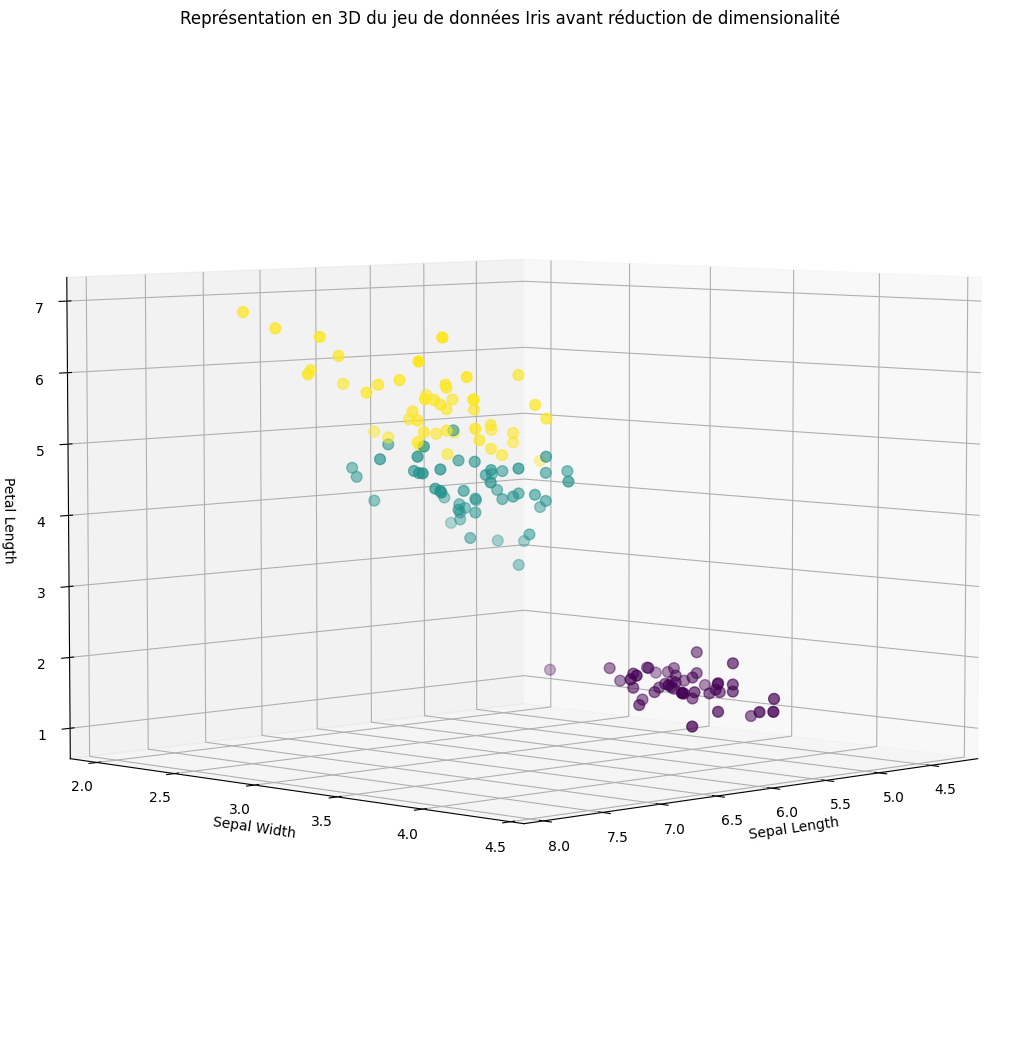

In [4]:
# Créer une figure en 3D
fig = plt.figure(figsize=(15,13))           # figure avec une taille de 15 en largeur et 13 en hauteur
ax = fig.add_subplot(111, projection='3d')  # pour ajouter un subplot (sous-graphique) à la figure créée

# Assignation des données aux dimensions/axes
x = df['sepal length (cm)']
y = df['sepal width (cm)']
z = df['petal length (cm)']

# Création du nuage de points (scatter) en 3D
ax.scatter(x, y, z, c=iris.target, s=60) # s indique la taille des points, et c octroie une couleur au type de fleur (sesota, versicolor, virginica)

# Définition des étiquettes sur les axes
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')

# Titre su graphique
plt.title('Représentation en 3D du jeu de données Iris avant réduction de dimensionalité')

# Ajustement de l'angle de visualisation du graphique
ax.view_init(elev=5, azim=45) # alev est l'inclinaison de l'angle de vue par rapport au plan horizontal, et azim l'angle de rotation sur l'axe vertical

# Afficher le graphique
plt.show()

**Etape 2 :** Reprendre l'étape 1 ci-dessus, mais après avoir centré puis réduit les variables correspondantes.



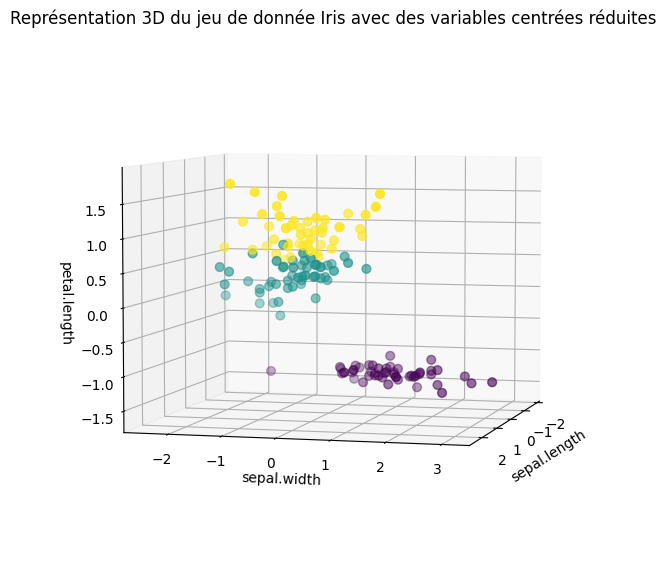

In [8]:
# import de la classe StandardScaler qui nous permettra de centrer les données autour de zéro et de réduite la variance à 1
from sklearn.preprocessing import StandardScaler 

# Instantiation de la classe
scaler = StandardScaler()

# Entaînement et transformation des données numériques de chacune des 4 colonnes du dataframe df
df_scaled = scaler.fit_transform(df)

# Création d'une nouvelle figure avec une taille appropriée
fig = plt.figure(figsize=(15,13))
ax = fig.add_subplot(121, projection='3d')


x = df_scaled[:, 0] # pour 'sepal length (cm)'
y = df_scaled[:, 1] # pour 'sepal width (cm)'
z = df_scaled[:, 2] # pour 'petal length (cm)'

ax.set_xlabel('sepal.length')
ax.set_ylabel('sepal.width')
ax.set_zlabel('petal.length')

# Construction du nuage de points avec les nouvelles variables centrées réduites (nous en avons considéré 3)
ax.scatter(x, y, z, c=iris.target, s=40) # s détermine la couleur du type de fleur, et s représente la taille des points à afficher

# Ajustement de la visualisation du graphique
ax.view_init(elev=5, azim=15)

plt.title('Représentation 3D du jeu de donnée Iris avec des variables centrées réduites')

plt.show()